# FED Quantitative Easing Analysis

The purpose of this study is to assess the effectiveness of Quantitative Easing (QE), an unconventional monetary policy tool adopted by the Bank of Japan (BoJ) and subsequently by the Federal Reserve (FED) in response to the 2008 financial crisis. The aim of QE was to mitigate the risk of economic collapse by injecting liquidity into the financial sector. The analysis focuses on the impact of QE on a range of key economic indicators in the United States, such as inflation rates, bond yields, T-bond yields, stock market performance, unemployment rates, and exchange rates.

Furthermore, this study aims to answer two fundamental questions regarding QE: firstly, whether QE can be considered a type of "money printing"; secondly, why money supply and lending did not increase during QE despite interest rates being held at zero levels.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import seaborn as sns
import time
import datetime as dt
from fredapi import Fred

In [7]:
# Setting up some basic parameters before further analysis
plt.style.use('fivethirtyeight')
pd.options.display.max_columns = 300
fred_key = "e51f53f785b4e60455b908ae62b771d3"

In [8]:
# setup FRED object
fred = Fred(api_key=fred_key)



QE is an increasing liquidity in financial sector through buying financial instruments by central bank. In order to have better understanding how it worsk first step is to take a look at FED balance sheet over time.

In [9]:
# Searching for best FRED data series reflecting FED balance sheet
def get_fred_table_with_series(looking_phrase):
    """Retrieves all series found in FRED databes by phrase and sorts by popularity"""
    ds = fred.search(looking_phrase, order_by='popularity')
    return ds

fed_balance_sheet = get_fred_table_with_series("FED Balance Sheet")
fed_balance_sheet

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
WALCL,WALCL,2023-04-01,2023-04-01,Assets: Total Assets: Total Assets (Less Elimi...,2002-12-18,2023-03-29,"Weekly, As of Wednesday",W,Millions of U.S. Dollars,Mil. of U.S. $,Not Seasonally Adjusted,NSA,2023-03-30 15:34:02-05:00,98,None
WTREGEN,WTREGEN,2023-04-01,2023-04-01,Liabilities and Capital: Liabilities: Deposits...,1986-01-08,2023-03-29,"Weekly, Ending Wednesday",W,Billions of U.S. Dollars,Bil. of U.S. $,Not Seasonally Adjusted,NSA,2023-03-30 15:34:06-05:00,78,This account is the primary operational accoun...
CURRCIR,CURRCIR,2023-04-01,2023-04-01,Currency in Circulation,1917-08-01,2023-03-01,Monthly,M,Billions of Dollars,Bil. of $,Not Seasonally Adjusted,NSA,2023-03-30 16:06:01-05:00,78,Data prior to 1991 are from various issues of ...
TREAST,TREAST,2023-04-01,2023-04-01,Assets: Securities Held Outright: U.S. Treasur...,2002-12-18,2023-03-29,"Weekly, As of Wednesday",W,Millions of U.S. Dollars,Mil. of U.S. $,Not Seasonally Adjusted,NSA,2023-03-30 15:35:02-05:00,74,The total face value of U.S. Treasury securiti...
WSHOMCB,WSHOMCB,2023-04-01,2023-04-01,Assets: Securities Held Outright: Mortgage-Bac...,2002-12-18,2023-03-29,"Weekly, As of Wednesday",W,Millions of U.S. Dollars,Mil. of U.S. $,Not Seasonally Adjusted,NSA,2023-03-30 15:35:02-05:00,73,The current face value of mortgage-backed obli...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D1WLFOL,D1WLFOL,2023-04-01,2023-04-01,Liabilities and Capital: Liabilities: Deposits...,2002-12-18,2023-03-29,"Weekly, As of Wednesday",W,Millions of U.S. Dollars,Mil. of U.S. $,Not Seasonally Adjusted,NSA,2023-03-30 15:35:50-05:00,1,None
H41RESPPAADNWW,H41RESPPAADNWW,2023-04-01,2023-04-01,Assets: Liquidity and Credit Facilities: Munic...,2002-12-18,2020-06-03,"Weekly, As of Wednesday",W,Millions of U.S. Dollars,Mil. of U.S. $,Not Seasonally Adjusted,NSA,2020-06-04 15:45:32-05:00,1,None
D7WLODL,D7WLODL,2023-04-01,2023-04-01,Liabilities and Capital: Liabilities: Deposits...,2002-12-18,2020-03-11,"Weekly, As of Wednesday",W,Millions of U.S. Dollars,Mil. of U.S. $,Not Seasonally Adjusted,NSA,2020-03-12 15:46:40-05:00,1,This series has been discontinued and will no ...


In [10]:
#Quick look at some key data about Balance Sheet data series
fed_bs = fred.get_series("WALCL")
print(fed_bs.head(10))
print(fed_bs.tail(10))
print(fed_bs.info())
print(f"Missing values counter: {fed_bs.isnull().sum()}")

2002-12-18    719542.0
2002-12-25    732059.0
2003-01-01    730994.0
2003-01-08    723762.0
2003-01-15    720074.0
2003-01-22    735953.0
2003-01-29    712809.0
2003-02-05    719643.0
2003-02-12    713281.0
2003-02-19    730400.0
dtype: float64
2023-01-25    8470557.0
2023-02-01    8433610.0
2023-02-08    8435369.0
2023-02-15    8384767.0
2023-02-22    8382190.0
2023-03-01    8339684.0
2023-03-08    8342283.0
2023-03-15    8639300.0
2023-03-22    8733787.0
2023-03-29    8705942.0
dtype: float64
<class 'pandas.core.series.Series'>
DatetimeIndex: 1059 entries, 2002-12-18 to 2023-03-29
Series name: None
Non-Null Count  Dtype  
--------------  -----  
1059 non-null   float64
dtypes: float64(1)
memory usage: 16.5 KB
None
Missing values counter: 0


<Axes: title={'center': 'FED Balance Sheet'}>

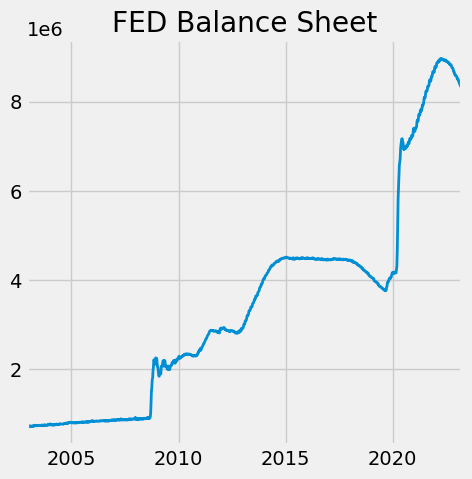

In [11]:
fed_bs.plot(figsize=(5, 5), title='FED Balance Sheet', lw=2)


As mentioned above the goal is to examine QE impact as a safety measure after finanacial crisis in 2008. Therefore for the analysis purposes will take under consideration time span between 2002-2020. Monetary steps undertaken by FED during Covid-19 pandemic deserve separate discussion.

In [12]:
# Filtering original dataset to get time span 2002-2020
def narrow_series_timespan(ds):
    new_ds = ds.loc[(ds.index < "2019-12-31") & (ds.index > "2002-01-01")]
    return new_ds
    
fed_bs_updated = narrow_series_timespan(fed_bs)

In [13]:
fed_bs_updated = pd.DataFrame(fed_bs_updated).reset_index()
fed_bs_updated.columns = ["Date", "Millions of US Dollars"]

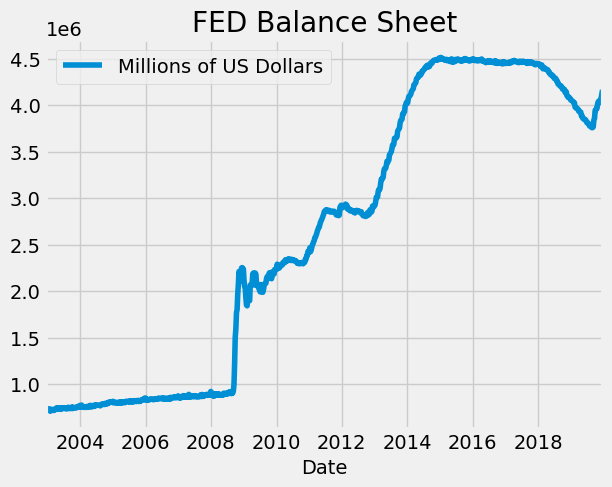

In [14]:
fed_bs_updated.plot(fed_bs_updated.columns[0], fed_bs_updated.columns[1], title="FED Balance Sheet" )
plt.show()

FED QE timeline:
 Q1: 2008-11-25 - 2010-08-10
 Q2: 2010-11-03 - 2012-06-20
 Q3: 2012-09-13 - 2014-10-29

In [83]:
#Check if above dates axists in data series
qe_1_span = ["2008-10-01" , "2010-08-10"]
qe_2_span = ["2010-11-03", "2012-06-20"]
qe_3_span = ["2012-09-13", "2014-10-29"]


def get_time_range(date_list):
    qe_range = fed_bs_updated[fed_bs_updated.Date.isin(pd.date_range(date_list[0],date_list[1]))]
    range_list = [qe_range.Date[1:2], qe_range.Date[-1:]]
    return range_list  

q1 = get_time_range(qe_1_span)
q2 = get_time_range(qe_2_span)
q3 = get_time_range(qe_3_span)


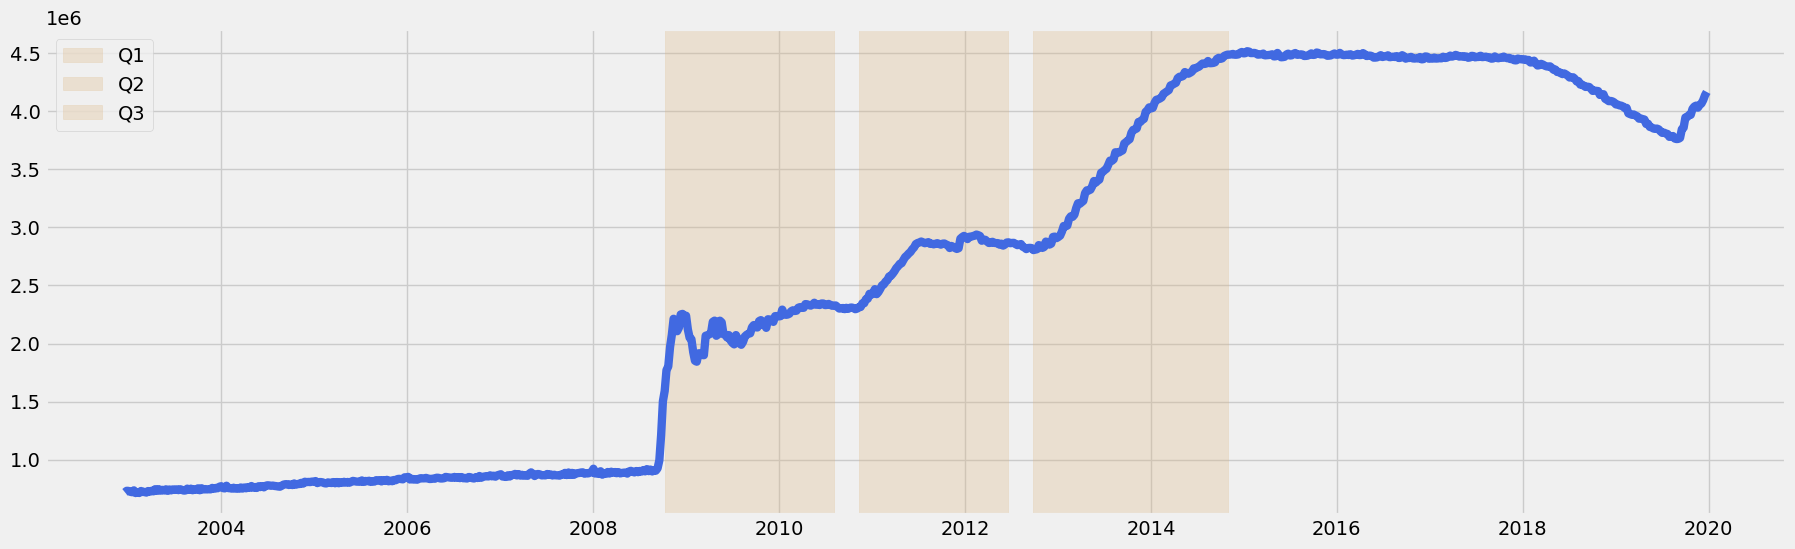

In [92]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(20, 6))
 
ax.plot(fed_bs_updated["Date"], fed_bs_updated["Millions of US Dollars"], color="royalblue", lw=6)

# Highlighting for a certain period of time
ax.axvspan(q1[0], q1[1], alpha=0.3, color="burlywood", label="Q1")
ax.axvspan(q2[0], q2[1], alpha=0.3, color="burlywood", label="Q2")
ax.axvspan(q3[0], q3[1], alpha=0.3, color="burlywood", label="Q3")
ax.legend()
plt.show()


### Bar Chart representing QE volumes

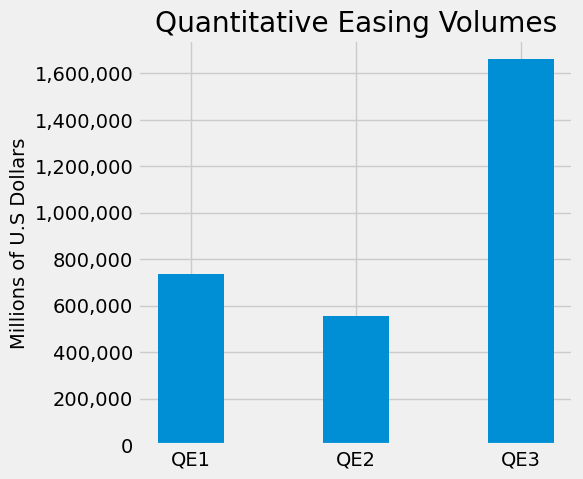

In [17]:
#List of QE span lists
qe_spans = [qe_1_span, qe_2_span, qe_3_span]

#Formating data type and creating dataframe
for i, qe in enumerate(qe_spans):
    qe = pd.Series(qe)
    qe = pd.to_datetime(qe)
    qe_spans[i] = qe

qe_spans = pd.DataFrame({"stage": ["start", "end"],
                        "Q1": qe_spans[0],
                        "Q2": qe_spans[1],
                        "Q3": qe_spans[2]}).set_index('stage')
qe_spans

#New column in FED balance sheet representing QE time
def qe_condition(row):
    qe = ""
    if row['Date'] > qe_spans.loc['start', 'Q1'] and row['Date'] < qe_spans.loc['end', 'Q1']:
        qe = "QE1"
    elif row['Date'] > qe_spans.loc['start', 'Q2'] and row['Date'] < qe_spans.loc['end', 'Q2']:
        qe = "QE2"
    elif row['Date'] > qe_spans.loc['start', 'Q3'] and row['Date'] < qe_spans.loc['end', 'Q3']:
        qe = "QE3"
    else:
        qe="N/A"
    return qe

fed_bs_copy= fed_bs_updated
fed_bs_copy['QE'] = fed_bs_copy.apply(qe_condition, axis=1)
fed_bs_copy.QE.value_counts()

def calculate_volumes(df):
    qe_types = df.QE.unique()
    qe_totals = {}
    for qe in qe_types:
        df_qe = df[df.QE == qe]
        qe_total = df_qe.iloc[-1, 1] - df_qe.iloc[0, 1]
        qe_totals[qe] = qe_total
    return qe_totals

#Final dataframe with QE volumes
qe_totals = calculate_volumes(fed_bs_copy)    
qe_totals = pd.DataFrame.from_dict(qe_totals, orient='index', columns=['Millions of U.S Dollars'])
qe_volumes = qe_totals.iloc[1:4]

#Bar chart
fig,ax = plt.subplots(figsize = (5, 5))
plt.bar(qe_volumes.index, qe_volumes['Millions of U.S Dollars'], width=0.4)
plt.ylabel('Millions of U.S Dollars')
plt.title("Quantitative Easing Volumes")
ax.set_yticks(ax.get_yticks()[:-1], [f"{int(x):,}" for x in ax.get_yticks()[:-1]]);
plt.show()

## Finding other economic metrics
Other metrics Tickers founded by using fred.search method

In [18]:
# Tickers of economic metrics in FRED database
metrics_ids = ['FEDFUNDS', 'DGS10',"PCETRIM12M159SFRBDAL", "UNRATE", "BOGMBASE", "M2SL"]
col_names = ['Federal Interest Rates', '10yr Treasury Yield',  "Inflation Rate YoY", "Unemployment Rate", "Monetary Base", "Money Supply"]

indexes_ids = ['SP500', 'NASDAQCOM', 'DJIA', 'RUT' ]
economic_metrics= {}

In [19]:
# Download and store FRED data in a dictionary. Observation time span should be between 2002 and 2019
start_date = '2002-01-01'
end_date = '2019-12-31'
for metrics_id, col_name in zip(metrics_ids, col_names):
    economic_metrics[col_name] = pd.DataFrame(fred.get_series(metrics_id, observation_start=start_date, observation_end=end_date), columns=[col_name])

In [20]:
print(economic_metrics)

{'Federal Interest Rates':             Federal Interest Rates
2002-01-01                    1.73
2002-02-01                    1.74
2002-03-01                    1.73
2002-04-01                    1.75
2002-05-01                    1.75
...                            ...
2019-08-01                    2.13
2019-09-01                    2.04
2019-10-01                    1.83
2019-11-01                    1.55
2019-12-01                    1.55

[216 rows x 1 columns], '10yr Treasury Yield':             10yr Treasury Yield
2002-01-01                  NaN
2002-01-02                 5.20
2002-01-03                 5.16
2002-01-04                 5.18
2002-01-07                 5.09
...                         ...
2019-12-25                  NaN
2019-12-26                 1.90
2019-12-27                 1.88
2019-12-30                 1.90
2019-12-31                 1.92

[4696 rows x 1 columns], 'Inflation Rate YoY':             Inflation Rate YoY
2002-01-01                2.24
2002-02-01 

Dataset 'Unemployment Rate' has to many rows comparing to orher ones. Only mean value from each month will be taken under consideration for further analysis

In [21]:
df = economic_metrics['Inflation Rate YoY']
df.index = pd.to_datetime(df.index)
df_update = df.resample('M').mean()
economic_metrics['Inflation Rate YoY'] = df_update

In [22]:
#Changing format date to yyyy-mm
for name, df in economic_metrics.items():
    df.index = pd.to_datetime(df.index)
    df.index = df.index.strftime("%Y-%m")

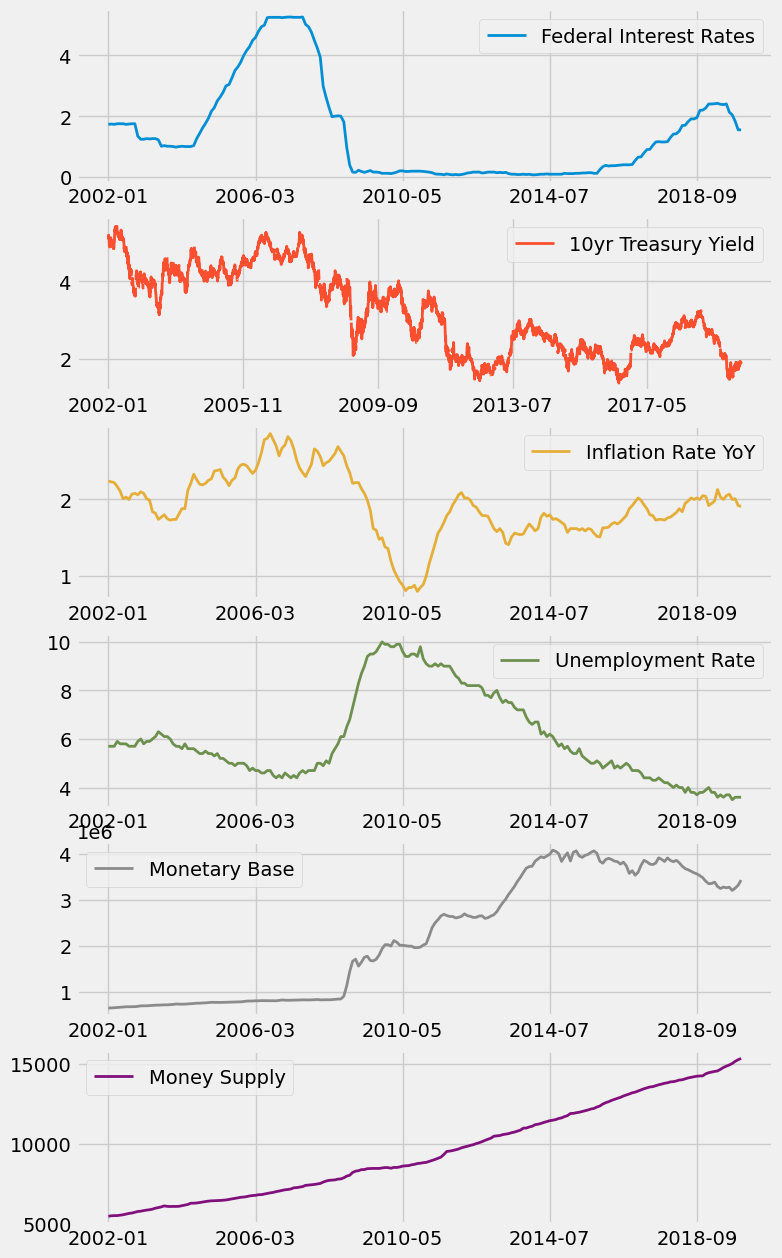

In [23]:
# Quick look at all metrics
fig, axes = plt.subplots(nrows = 6, ncols = 1, figsize = (8, 15))
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

for i, name in enumerate(economic_metrics):
        economic_metrics[name].plot.line(ax=axes[i], color=color_pal[i], label=name, lw=2)
plt.show()

In [24]:
# Modyfing FED balance sheet dataset for furhter analysis. 
# fed_bs represents max value of FED's balance sheet per each month
fed_bs = fed_bs_updated.copy()
fed_bs= fed_bs.set_index('Date')
fed_bs.index = pd.to_datetime(fed_bs.index)

fed_bs = fed_bs.resample('M').max()
fed_bs.index = fed_bs.index.strftime("%Y-%m")
fed_bs.drop(["QE"], axis=1, inplace=True)
fed_bs

,Millions of US Dollars
Date,
2002-12,732059.0
2003-01,735953.0
2003-02,730400.0
2003-03,729923.0
2003-04,746294.0
...,...
2019-08,3786018.0
2019-09,3857715.0
2019-10,4019823.0


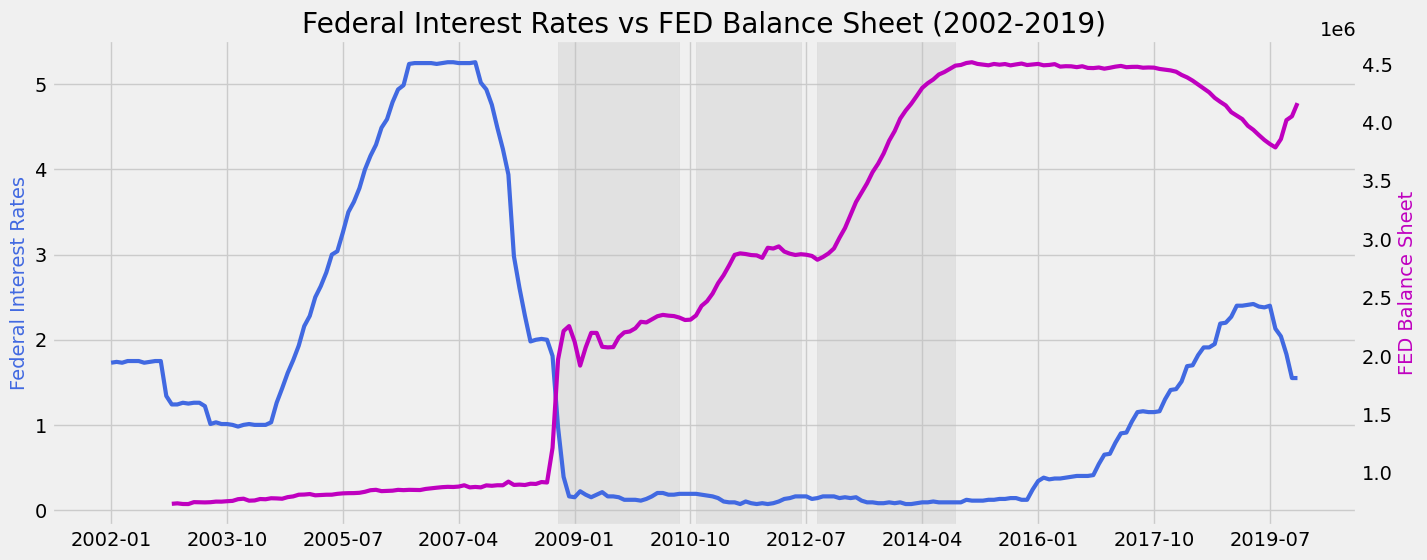

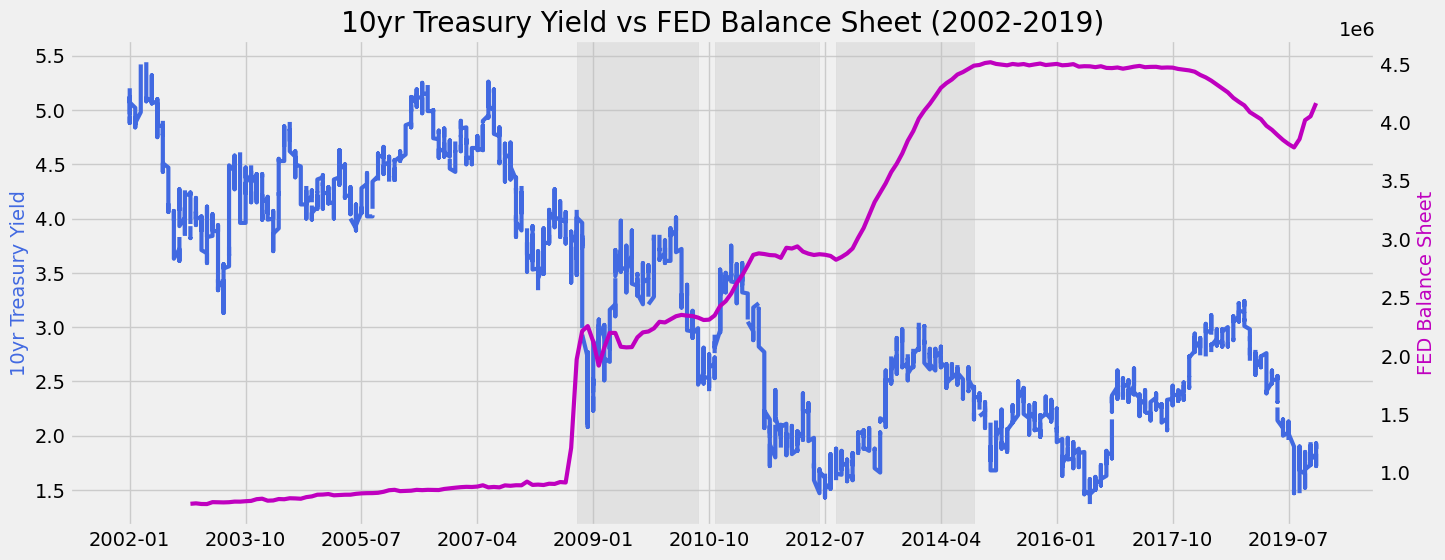

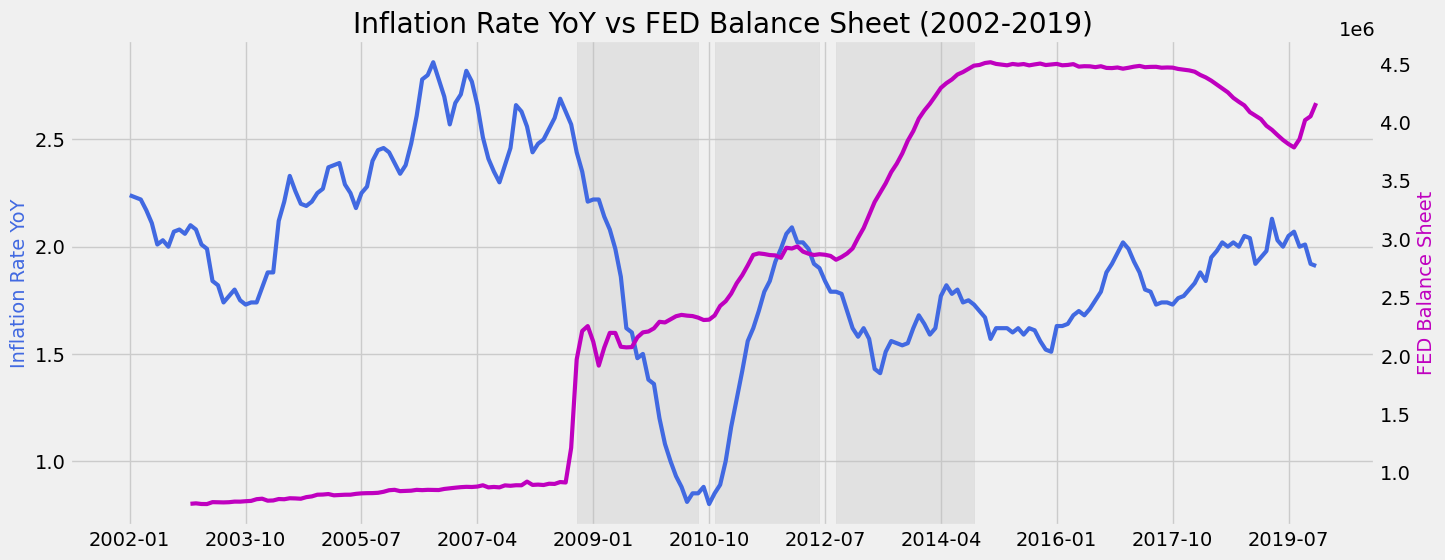

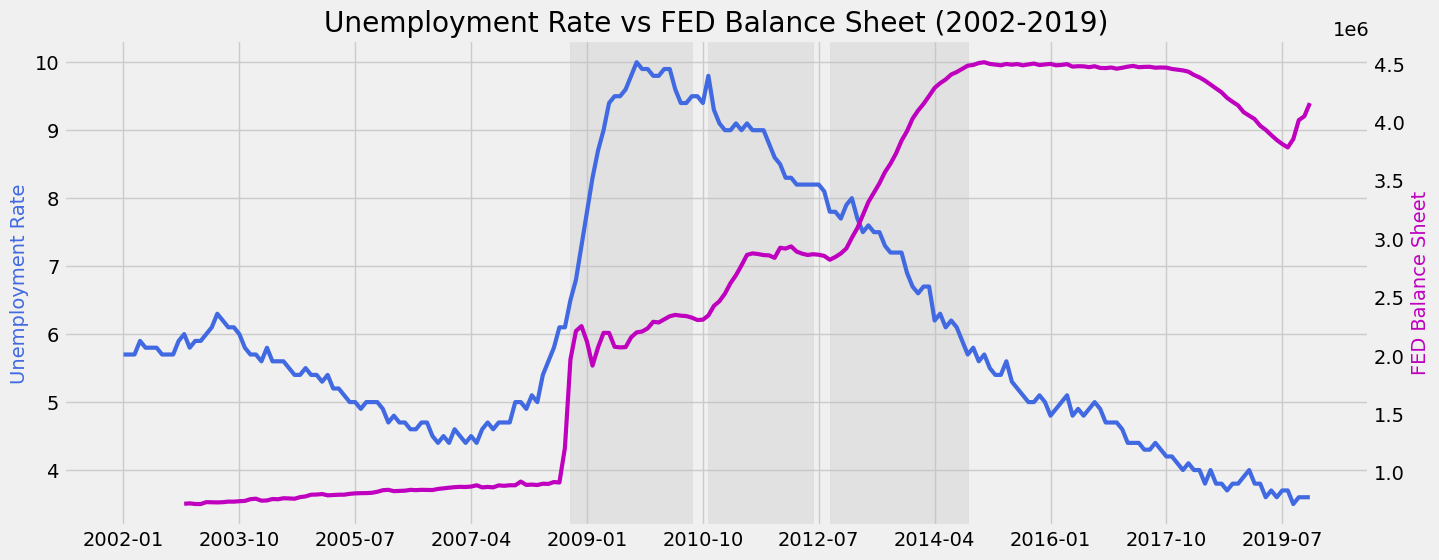

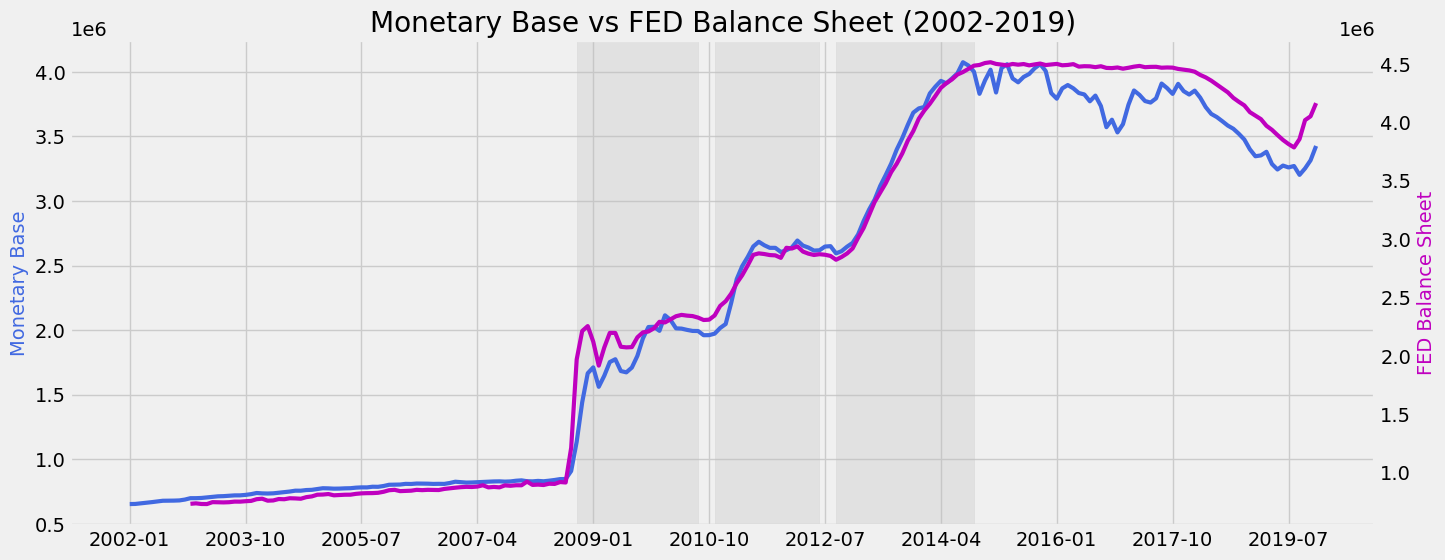

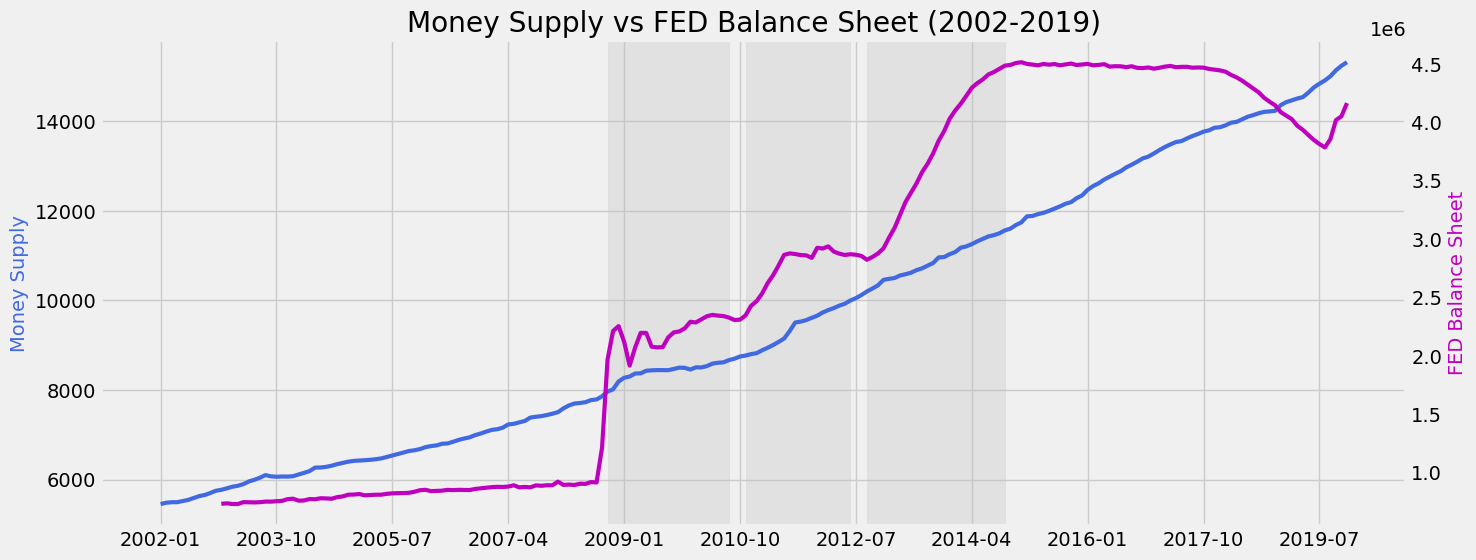

In [25]:
## Define the QE periods
qe_1_span = ["2008-10" , "2010-08"]
qe_2_span = ["2010-11", "2012-06"]
qe_3_span = ["2012-09", "2014-10"]
span_list = [qe_1_span, qe_2_span, qe_3_span]
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# Plot each DataFrame in the economic_metrics dictionary
for i, (col_name, df) in enumerate(economic_metrics.items()):
    fig, ax = plt.subplots(figsize=(15,6))
    ax2 = ax.twinx()
    
    ax.plot(df.index, df[col_name], label=col_name[i], color="royalblue", lw=3)
    ax.legend = False
    ax.set_ylabel(col_name, color="royalblue" )
    ax.set_xticks(ax.get_xticks()[::len(ax.get_xticks())//10])
    
    ax2.plot(fed_bs, color='m', lw=3)
    ax2.grid(False)
    ax2.set_ylabel("FED Balance Sheet", color='m')

    ax.set_title(f'{col_name} vs FED Balance Sheet (2002-2019)') 
    
    
    # Add an axvspan for each QE period
    for i, qe_span in enumerate(span_list):
        ax.axvspan(qe_span[0], qe_span[1], alpha=0.3, color="silver", label= f"Q{i+1}") 
        
    # Add legends
#     lines, labels = ax.get_legend_handles_labels()
#     ax2.legend(lines, labels, loc='upper left')

plt.show()




The final graph entitled 'Money Supply vs Balance Sheet' presents the dynamics of both metrics. Despite the Federal Reserve (FED) dramatically increasing its balance sheet (and Monetary Base) by injecting liquidity into the financial sector, the growth of Money Supply has remained stable over time. This can be attributed to the fact that all the liquidity provided to banks by the FED has not impacted the Money Supply since the process of money creation is typically initiated by an increase in lending to the real economy.

The primary objective of Quantitative Easing (QE) is to reduce long-term borrowing costs. As is evident from the '10yr Treasury Yield' chart, the FED was able to successfully lower the yields of long-term bonds through its implementation of QE.

### Why inflation and money lending has not increased while interest rates were low and banks had significant reserves available for lending ?

In [67]:
#Download dataset representing total outstaning debt own by US nonfinancial sector
metrics_ids_2 = ['COMREPUSQ159N','TDSP', 'USLSTL' ]
col_names_2 = ['House Price Index','US Households Debt','US Banks Debt']
economic_metrics_2= {}

for metrics_id, col_name in zip(metrics_ids_2, col_names_2):
    economic_metrics_2[col_name] = pd.DataFrame(fred.get_series(metrics_id, observation_start=start_date, observation_end=end_date), columns=[col_name])
    economic_metrics_2[col_name].columns = [col_name]
    
economic_metrics_2

{'House Price Index':             House Price Index
 2005-01-01             15.891
 2005-04-01             12.895
 2005-07-01             10.018
 2005-10-01             11.886
 2006-01-01             14.128
 2006-04-01             15.272
 2006-07-01             15.237
 2006-10-01             11.913
 2007-01-01             13.057
 2007-04-01             12.141
 2007-07-01             11.404
 2007-10-01             10.557
 2008-01-01              1.472
 2008-04-01             -6.228
 2008-07-01             -6.573
 2008-10-01            -11.217
 2009-01-01             -9.729
 2009-04-01            -19.616
 2009-07-01            -29.747
 2009-10-01            -28.142
 2010-01-01            -27.541
 2010-04-01             -7.133
 2010-07-01              3.925
 2010-10-01              7.364
 2011-01-01             13.159
 2011-04-01              3.127
 2011-07-01              1.299
 2011-10-01              4.645
 2012-01-01              4.409
 2012-04-01              3.441
 2012-07-01       

### Collapsing home prices from subprime mortgage defaults

To better understand context of QE policy and answer the second question we need to take a closer look to its origin which is real eastate buble on US market. 

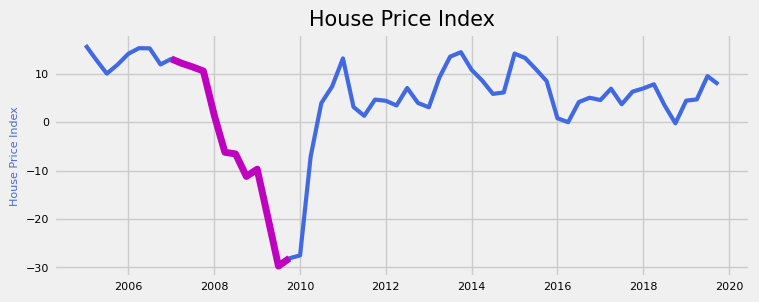

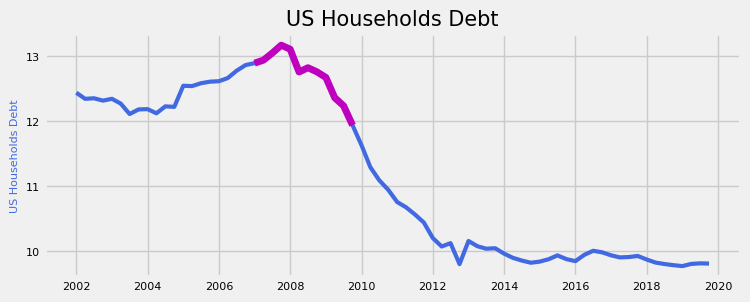

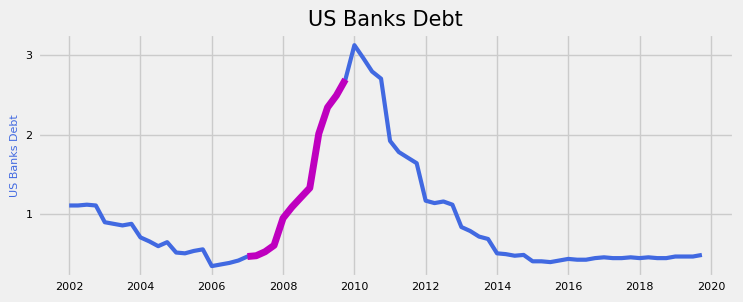

In [93]:

# Plot each DataFrame in the economic_metrics dictionary
for i, (col_name, df) in enumerate(economic_metrics_2.items()):
    fig, ax = plt.subplots(figsize=(8,3))
    
    financial_crisis = df.copy(
                   )[(df.index.year >= 2007
                   ) & (df.index.year <= 2009)]
    
    ax.plot(df.index, df[col_name], label=col_name[i], color="royalblue", lw=3)
    ax.plot(financial_crisis.index, financial_crisis[col_name],  color="m", lw=5)
    ax.legend = False
    ax.set_title(col_name, fontsize=15)
    ax.set_ylabel(col_name, color="royalblue", fontsize=8 )
    plt.yticks(fontsize=8)
    plt.xticks(fontsize=8)

plt.show()


There were two primary reasons for the stability of lending and inflation during the QE period. Firstly, the collapse of the US housing market led to a substantial drop in real estate valuations, rendering refinancing mortgages unfeasible and forcing borrowers to repay their loans. Consequently, there was a lack of demand for new lending in banks despite the abundant liquidity in the financial system. 
Secondly, following the housing bubble's burst, banks began to suffer losses due to the presence of bad loans in their balance sheets. In order to retain the capital that equates to the extent of potential losses, banks were unable to lend money. If banks bear losses, their capital depletes, and issuing new loans could exacerbate potential losses.